# Head to head comparison

In this notebook, I will explore how well my own "from scratch" implementation of a Gaussian Naive Bayes classifier compares to the scikit-learn model. For this test, I will utilize the sklearn `make_classification` function to create a series of classification tasks that gradually increase in difficulty. Both models will created with comparatively similar hyperparameters and scored on each of the classification tasks.

In [35]:
from nb import NaiveBayes
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score

In [36]:
data = dict()
for i in range(1,11):
    # create new data
    data[i] = dict()
    data[i]['x'], data[i]['y'] = make_classification(
        n_samples=500,
        n_features=8,
        n_informative=3,
        n_clusters_per_class=1,
        # Gradually move the clusters closer together to create
        # harder classification tasks
        class_sep=(1/i)/0.3,
        random_state=42
    )

In [37]:
# Score my GNB model on all datasets
my_model = dict()
for i in range(1, 11):
    my_model[i] = dict()
    my_model[i]['model'] = NaiveBayes()
    my_model[i]['model'].fit(data[i]['x'], data[i]['y'])
    my_model[i]['score'] = my_model[i]['model'].accuracy_score(data[i]['x'], data[i]['y'])

In [38]:
# Score the Scikit-learn GaussianNB model on all datasets
skl_model = dict()
for i in range(1, 11):
    skl_model[i] = dict()
    skl_model[i]['model'] = GaussianNB()
    skl_model[i]['model'].fit(data[i]['x'], data[i]['y'])
    skl_model[i]['score'] = skl_model[i]['model'].score(data[i]['x'], data[i]['y'])

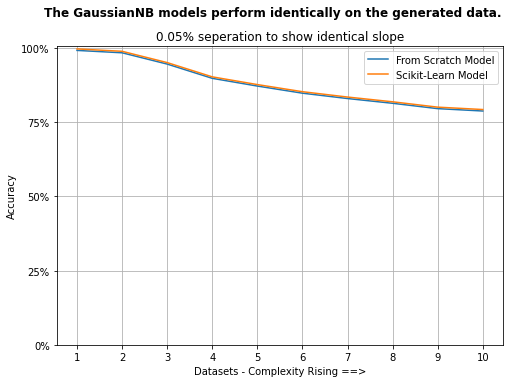

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the scores for each model
fig, ((ax1)) = plt.subplots(1,1, figsize=(8,5.5), facecolor=None)
ax1 = sns.lineplot(
    x=range(1,11), y=[my_model[i]['score'] - 0.005 for i in my_model],
    label="From Scratch Model"
    )
ax1 = sns.lineplot(
    x=range(1,11), y=[skl_model[i]['score'] for i in skl_model],
    label="Scikit-Learn Model"
    )

ax1.set_facecolor("None")
# Title, axis labels, etc..
plt.suptitle("The GaussianNB models perform identically on the generated data.",
         fontweight='bold', fontsize=12)
plt.title("0.05% seperation to show identical slope")
plt.xlabel("Datasets - Complexity Rising ==>")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel("Accuracy")
plt.yticks([0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
plt.grid(True)

In [40]:
for i in my_model:
    print(my_model[i]['score'])

0.996
0.988
0.95
0.902
0.876
0.852
0.834
0.818
0.8
0.792


In [41]:
for i in skl_model:
    print(skl_model[i]['score'])

0.996
0.988
0.95
0.902
0.876
0.852
0.834
0.818
0.8
0.792


# Result:

These results are not surprising. The implementation, while not 100% identical, is _very_ similar. In practice with generated data, it would be more surprising if there were any deviation in model performance. With this test, I can safely conclude that my implementation of a Gaussian Naive Bayes classifier, while elementary and inefficient compared to sklearn's, works to a satisfactory degree.